In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,656 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [2]:
!pip install git+https://github.com/tensorflow/examples.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-fy98ysu7
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-fy98ysu7
  Created wheel for tensorflow-examples: filename=tensorflow_examples-2741b9ea31622676451e2ce1414d233de45f915f_-py3-none-any.whl size=299717 sha256=2529049c4e24fc0278a8e5388eb439f127269b85b21a715290369f158df648b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-1v6k7_01/wheels/4e/f5/c2/bfe75b834c9028b2529023bf74541c46ead531b513a8010d21
Failed to build tensorflow-examples
    Running setup.py install for tensorflow-examples ... done
  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/i

In [2]:
import os.path
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from pathlib import Path
from tqdm import tqdm
from time import perf_counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display

In [3]:
#연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import tensorflow as tf
from IPython.display import clear_output
import matplotlib.pyplot as plt
from tensorflow_examples.models.pix2pix import pix2pix
from six import b
from google.colab.patches import cv2_imshow
import glob
import os
import cv2

In [6]:
!unzip -qq "/content/drive/MyDrive/scalp.zip"

In [ ]:
# def classification(data_dir):
#   IMG_SIZE=128
#   x=[]
#   y=[]
#   for category in os.listdir(data_dir):
#     categories = os.listdir(data_dir)
#     path = os.path.join(data_dir, category)
#     class_num = categories.index(category)

#     for img in os.listdir(path):  # iterate over each image per dogs and cats
#         try:
#             img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
#             new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
#             x.append(new_array/255)
#             y.append(class_num)  # add this to our training_data
#         except Exception as e:  # in the interest in keeping the output clean...
#             pass

#     return x,y

In [7]:
#파일 한개만 보기
file_path = '/content/원천데이터/5.비듬/0.양호/9414_A2LEBJJDE00033L_1610170678952_3_TH.jpg'
example_data = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
example_data.shape

(480, 640)

In [4]:
for i in glob.glob('/content/원천데이터/*'):
    for j in glob.glob(i+'/0.양호/**.jpg'):
      print(j)

In [5]:
#양호만 나눴을 경우
import shutil
def moving():
  #파일 만들기
  #각 양호에 포함된 이미지 파일이 같기 때문에 첫번째 폴더에 이미지만 이동 시키고 나머지 폴더에 양호는 삭제
  if os.path.isdir('/content/원천데이터/0.양호') == False:
    os.mkdir('/content/원천데이터/0.양호')
  for i in glob.glob('/content/원천데이터/1.미세각질/0.양호/**.jpg'):
    shutil.move( i ,'/content/원천데이터/0.양호')
  shutil.rmtree('/content/원천데이터/2.피지과다/0.양호')
  shutil.rmtree('/content/원천데이터/3.모낭사이홍반/0.양호')
  shutil.rmtree('/content/원천데이터/4.모낭홍반농포/0.양호')
  shutil.rmtree('/content/원천데이터/5.비듬/0.양호')
  shutil.rmtree('/content/원천데이터/6.탈모/0.양호')



        

moving()

FileNotFoundError: ignored

In [8]:
#구분하기 어려울 수 있는 경증만 삭제하고 나눴을 경우
import shutil
def moving():
  #파일 만들기
  #각 양호에 포함된 이미지 파일이 같기 때문에 첫번째 폴더에 이미지만 이동 시키고 나머지 폴더에 양호는 삭제
  if os.path.isdir('/content/원천데이터/0.양호') == False:
    os.mkdir('/content/원천데이터/0.양호')
  for i in glob.glob('/content/원천데이터/1.미세각질/0.양호/**.jpg'):
    shutil.move( i ,'/content/원천데이터/0.양호')
  shutil.rmtree('/content/원천데이터/2.피지과다/0.양호')
  shutil.rmtree('/content/원천데이터/3.모낭사이홍반/0.양호')
  shutil.rmtree('/content/원천데이터/4.모낭홍반농포/0.양호')
  shutil.rmtree('/content/원천데이터/5.비듬/0.양호')
  shutil.rmtree('/content/원천데이터/6.탈모/0.양호')
  shutil.rmtree('/content/원천데이터/2.피지과다/1.경증')
  shutil.rmtree('/content/원천데이터/1.미세각질/1.경증')
  shutil.rmtree('/content/원천데이터/3.모낭사이홍반/1.경증')
  shutil.rmtree('/content/원천데이터/4.모낭홍반농포/1.경증')
  shutil.rmtree('/content/원천데이터/5.비듬/1.경증')
  shutil.rmtree('/content/원천데이터/6.탈모/1.경증')


        

moving()

In [5]:
dir_ = Path('/content/원천데이터')
filepaths = list(dir_.glob(r'**/*.jpg'))
def proc_img(filepath):
    """
   		이미지데이터의 경로와 label데이터로 데이터프레임 만들기 
    """
    labels =[]
    for i in range(len(filepath)):
      if str(filepath[i]).split("/")[-2] == '0.양호':
        labels.append(str(filepath[i]).split("/")[-2])        
      elif str(filepath[i]).split("/")[-2] != '0.양호':
        labels.append(str(filepath[i]).split("/")[-3])
      else: 
        labels.append(str(filepath[i]).split("/")[-3])

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels , name='Label')
    # 경로와 라벨 concatenate
    df = pd.concat([filepath, labels], axis=1)

    # index 재설정
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)
    
    return df

df = proc_img(filepaths)
df.head(5)

Filepath     Label
0  /content/원천데이터/3.모낭사이홍반/2.중등도/9864_A2LEBJJDE00...  3.모낭사이홍반
1  /content/원천데이터/3.모낭사이홍반/3.중증/7670_A1LCAIHDH000...  3.모낭사이홍반
2  /content/원천데이터/6.탈모/2.중등도/2602_A1LCAIHDH00013Y...      6.탈모
3  /content/원천데이터/5.비듬/2.중등도/7985_A1LCAIHDH00011D...      5.비듬
4  /content/원천데이터/1.미세각질/2.중등도/9578_A2LEBJJDE0010...    1.미세각질

In [6]:
print(f'Number of pictures: {df.shape[0]}\n')
print(f'Number of different labels: {len(df.Label.unique())}\n')
print(f'Labels: {df.Label.unique()}')

Number of pictures: 2277

Number of different labels: 7

Labels: ['3.모낭사이홍반' '6.탈모' '5.비듬' '1.미세각질' '2.피지과다' '4.모낭홍반농포' '0.양호']


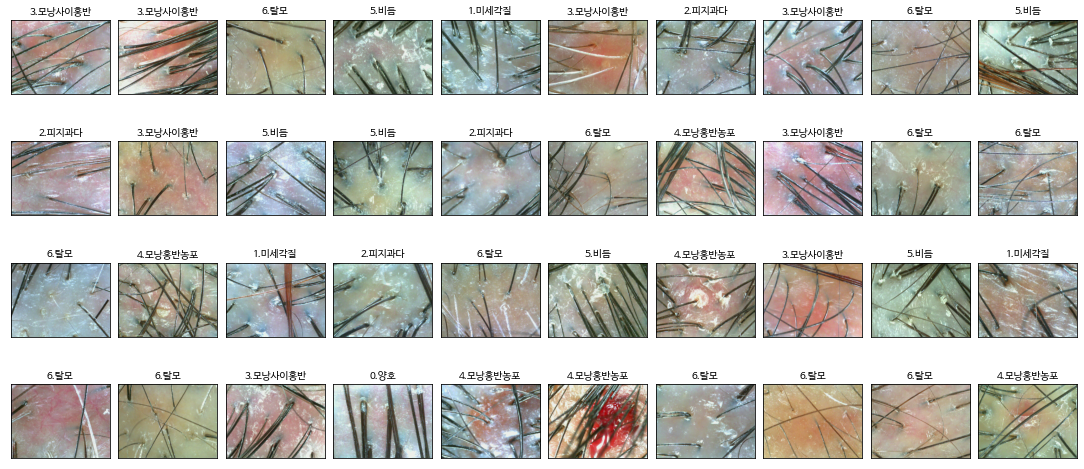

In [8]:
from matplotlib import font_manager, rc
# 데이터 확인
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.Filepath[i]))
    ax.set_title(df.Label[i], fontsize = 10)
    plt.rc('font', family='NanumBarunGothic')
    
plt.tight_layout(pad=0.5)
plt.rc('font', family='NanumBarunGothic')
plt.show();

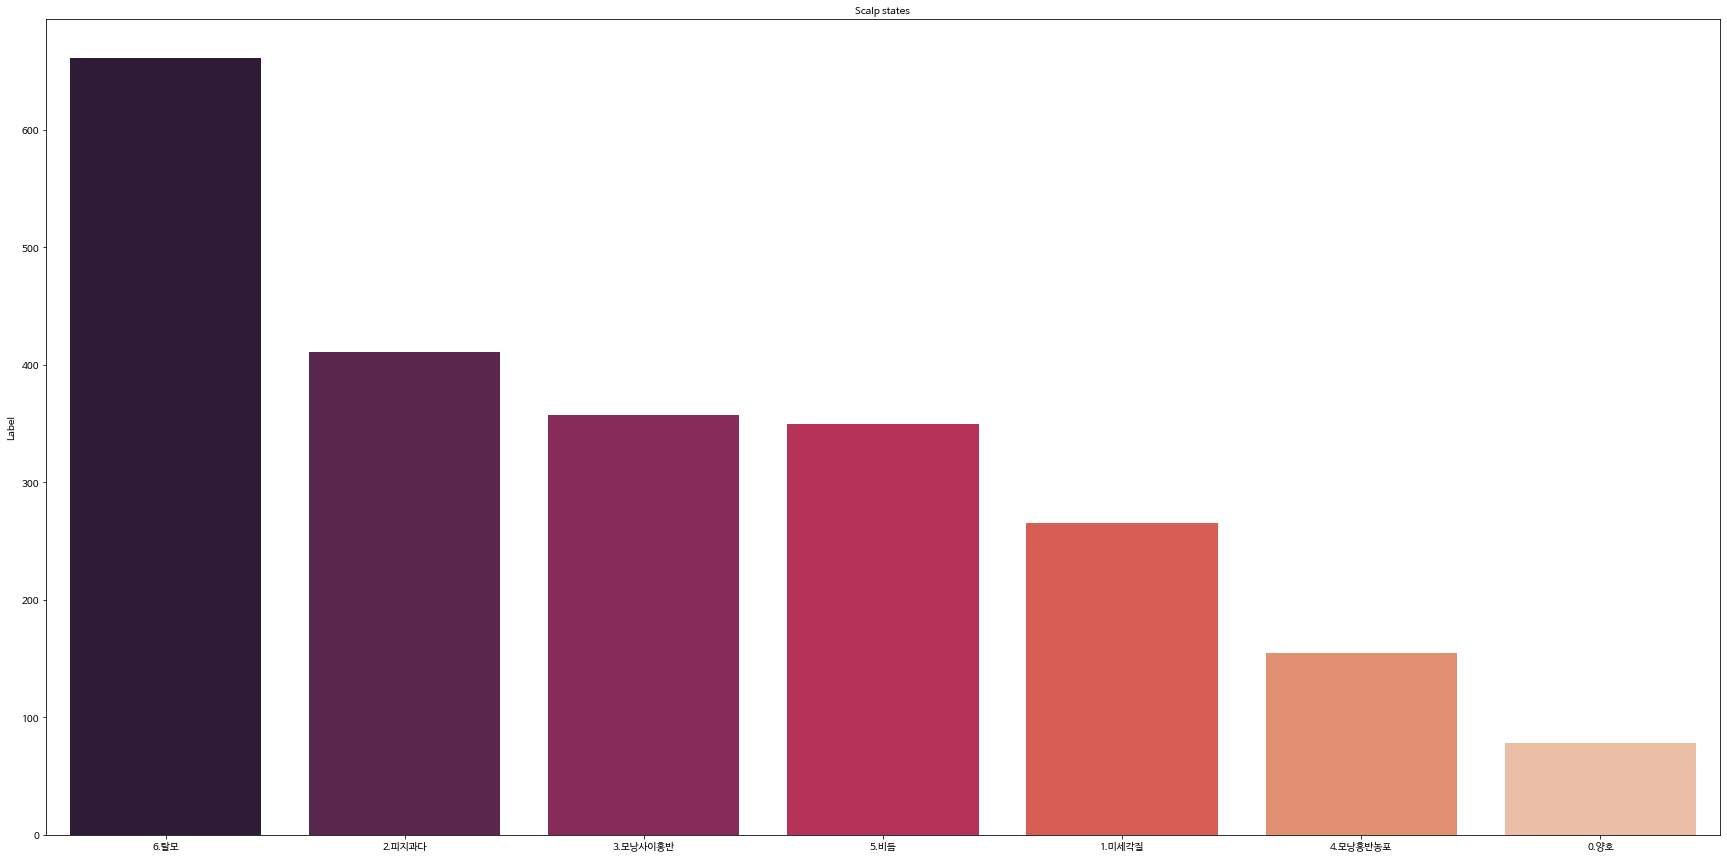

In [9]:
vc = df['Label'].value_counts()
plt.figure(figsize=(30,15))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Scalp states", fontsize = 10)
plt.show()

In [10]:
# Training/test split
# train_df,test_df = train_test_split(df.sample(frac=0.2), test_size=0.1,random_state=0) #모델링 시간이 오래걸리면 사용
train_df,test_df = train_test_split(df, test_size=0.1,random_state=0)
train_df.shape,test_df.shape

((2049, 2), (228, 2))

In [11]:
import numpy as np
import tensorflow as tf


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.2)

train_gen = train_datagen.flow_from_directory(dir_,
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='training')
val_gen  = train_datagen.flow_from_directory(dir_,
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='validation')

Found 1823 images belonging to 7 classes.
Found 454 images belonging to 7 classes.


In [13]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=7, activation='softmax'))

# Compiling the CNN
cnn.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [22]:
#1.경증을 제외한 상황
cnn.fit(x = train_gen, validation_data = val_gen, epochs = 5)

Epoch 1/5
57/57 [==============================] - 72s 1s/step - loss: 1.8740 - accuracy: 0.3182 - val_loss: 1.6564 - val_accuracy: 0.3480
Epoch 2/5
57/57 [==============================] - 70s 1s/step - loss: 1.5578 - accuracy: 0.4059 - val_loss: 1.6058 - val_accuracy: 0.3436
Epoch 3/5
57/57 [==============================] - 72s 1s/step - loss: 1.3941 - accuracy: 0.4756 - val_loss: 1.5959 - val_accuracy: 0.3546
Epoch 4/5
57/57 [==============================] - 70s 1s/step - loss: 1.2066 - accuracy: 0.5551 - val_loss: 1.7334 - val_accuracy: 0.3436
Epoch 5/5
57/57 [==============================] - 70s 1s/step - loss: 1.0314 - accuracy: 0.6094 - val_loss: 1.7898 - val_accuracy: 0.3546


In [14]:
cnn.fit(x = train_gen, validation_data = val_gen, epochs = 5)

Epoch 1/10
91/91 [==============================] - 110s 1s/step - loss: 1.8008 - accuracy: 0.3062 - val_loss: 1.9199 - val_accuracy: 0.1657
Epoch 2/10
91/91 [==============================] - 101s 1s/step - loss: 1.6373 - accuracy: 0.3536 - val_loss: 1.8420 - val_accuracy: 0.2652
Epoch 3/10
91/91 [==============================] - 103s 1s/step - loss: 1.5089 - accuracy: 0.4306 - val_loss: 1.9785 - val_accuracy: 0.1754
Epoch 4/10
91/91 [==============================] - 102s 1s/step - loss: 1.3475 - accuracy: 0.4952 - val_loss: 2.0517 - val_accuracy: 0.1796
Epoch 5/10
91/91 [==============================] - 100s 1s/step - loss: 1.1721 - accuracy: 0.5684 - val_loss: 2.0450 - val_accuracy: 0.2334
Epoch 6/10
91/91 [==============================] - 103s 1s/step - loss: 0.9915 - accuracy: 0.6196 - val_loss: 2.5652 - val_accuracy: 0.1215
Epoch 7/10
67/91 [=====================>........] - ETA: 23s - loss: 0.8454 - accuracy: 0.6844

KeyboardInterrupt: ignored

In [12]:
def create_gen():
    # 생성기 및 데이터 증강으로 이미지 로드
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.1
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath', # 파일위치 열이름
        y_col='Label', # 클래스 열이름
        target_size=(224, 224), # 이미지 사이즈
        color_mode='rgb', # 이미지 채널수
        class_mode='categorical', # Y값(Label값)
        batch_size=32,
        shuffle=True, # 데이터를 섞을지 여부
        seed=0,
        subset='training', # train 인지 val인지 설정
        rotation_range=30, # 회전제한 각도 30도
        zoom_range=0.15, # 확대 축소 15%
        width_shift_range=0.2, # 좌우이동 20%
        height_shift_range=0.2, # 상하이동 20%
        shear_range=0.15, # 반시계방햐의 각도
        horizontal_flip=True, # 좌우 반전 True
        fill_mode="nearest"
        # 이미지 변경시 보완 방법 (constant, nearest, reflect, wrap) 4개 존재
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation',
        rotation_range=30,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )
    
    return train_generator,test_generator,train_images,val_images,test_images

In [14]:
def get_model(model):
# Load the pretained model
    kwargs =    {'input_shape':(224, 224, 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}
    
    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False # 레이어를 동결 시켜서 훈련중 손실을 최소화 한다.
    
    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    outputs = tf.keras.layers.Dense(7, activation='softmax')(x)
    # 라벨 개수가 8개이기 때문에 Dense도 8로 설정
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [18]:
#전처리 1 (경증 포함)
train_df,test_df = train_test_split(df, test_size=0.1, random_state=0)
train_generator,test_generator,train_images,val_images,test_images=create_gen()

model = get_model(tf.keras.applications.DenseNet201)
history = model.fit(train_images,validation_data=val_images,epochs=7)

Found 2943 validated image filenames belonging to 7 classes.
Found 327 validated image filenames belonging to 7 classes.
Found 364 validated image filenames belonging to 7 classes.
Epoch 1/7
92/92 [==============================] - 799s 8s/step - loss: 1.6212 - accuracy: 0.3765 - val_loss: 1.4977 - val_accuracy: 0.4128
Epoch 2/7
92/92 [==============================] - 749s 8s/step - loss: 1.4285 - accuracy: 0.4614 - val_loss: 1.4482 - val_accuracy: 0.4434
Epoch 3/7
92/92 [==============================] - 758s 8s/step - loss: 1.3637 - accuracy: 0.4801 - val_loss: 1.4948 - val_accuracy: 0.4190
Epoch 4/7
92/92 [==============================] - 770s 8s/step - loss: 1.3203 - accuracy: 0.4958 - val_loss: 1.4093 - val_accuracy: 0.4893
Epoch 5/7
92/92 [==============================] - 762s 8s/step - loss: 1.2649 - accuracy: 0.5093 - val_loss: 1.3696 - val_accuracy: 0.4648
Epoch 6/7
92/92 [==============================] - 758s 8s/step - loss: 1.2201 - accuracy: 0.5216 - val_loss: 1.4330 - 

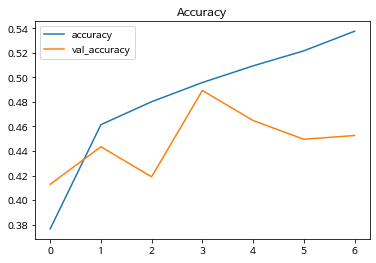

In [19]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

In [18]:
#전처리 2 (경증 제외)
train_df,test_df = train_test_split(df, test_size=0.1, random_state=0)
train_generator,test_generator,train_images,val_images,test_images=create_gen()

model = get_model(tf.keras.applications.DenseNet201)
history = model.fit(train_images,validation_data=val_images,epochs=7)

Found 1845 validated image filenames belonging to 7 classes.
Found 204 validated image filenames belonging to 7 classes.
Found 228 validated image filenames belonging to 7 classes.
74836368/74836368 [==============================] - 1s 0us/step
Epoch 1/7
58/58 [==============================] - 570s 10s/step - loss: 1.4868 - accuracy: 0.4466 - val_loss: 1.4044 - val_accuracy: 0.4951
Epoch 2/7
58/58 [==============================] - 569s 10s/step - loss: 1.1795 - accuracy: 0.5534 - val_loss: 1.2140 - val_accuracy: 0.5392
Epoch 3/7
58/58 [==============================] - 540s 9s/step - loss: 1.0622 - accuracy: 0.6065 - val_loss: 1.2767 - val_accuracy: 0.5539
Epoch 4/7
58/58 [==============================] - 624s 11s/step - loss: 1.0056 - accuracy: 0.6238 - val_loss: 1.1663 - val_accuracy: 0.6029
Epoch 5/7
58/58 [==============================] - 593s 10s/step - loss: 0.8951 - accuracy: 0.6629 - val_loss: 1.2234 - val_accuracy: 0.5539
Epoch 6/7
58/58 [==============================] -

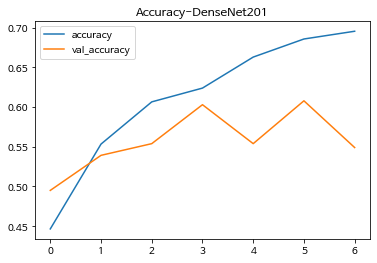

In [19]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy-DenseNet201")
plt.show()

In [15]:
train_df,test_df = train_test_split(df, test_size=0.1, random_state=0)
train_generator,test_generator,train_images,val_images,test_images=create_gen()

model = get_model(tf.keras.applications.ResNet152V2)
history = model.fit(train_images,validation_data=val_images,epochs=8)

Found 1845 validated image filenames belonging to 7 classes.
Found 204 validated image filenames belonging to 7 classes.
Found 228 validated image filenames belonging to 7 classes.
234545216/234545216 [==============================] - 2s 0us/step
Epoch 1/8
58/58 [==============================] - 916s 16s/step - loss: 1.6252 - accuracy: 0.3794 - val_loss: 1.4874 - val_accuracy: 0.4216
Epoch 2/8
58/58 [==============================] - 901s 16s/step - loss: 1.2542 - accuracy: 0.5198 - val_loss: 1.4646 - val_accuracy: 0.4559
Epoch 3/8
58/58 [==============================] - 894s 15s/step - loss: 1.1026 - accuracy: 0.5778 - val_loss: 1.4605 - val_accuracy: 0.4706
Epoch 4/8
58/58 [==============================] - 900s 16s/step - loss: 0.9360 - accuracy: 0.6352 - val_loss: 1.3582 - val_accuracy: 0.4608
Epoch 5/8
58/58 [==============================] - 896s 15s/step - loss: 0.8251 - accuracy: 0.6764 - val_loss: 1.4704 - val_accuracy: 0.4804
Epoch 6/8
58/58 [==============================

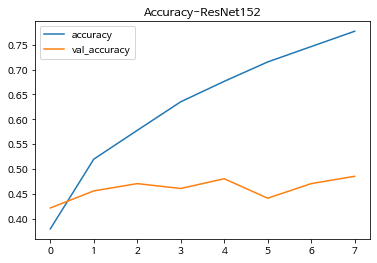

In [16]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy-ResNet152")
plt.show()